In [1]:
# Early WIP

In [35]:
# Standard imports
import pandas as pd
import numpy as np
from zipfile import ZipFile

# Plotting 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from bokeh.plotting import figure, output_notebook, show, output_file
import seaborn as sns

from bokeh.models import (
    GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, 
    WheelZoomTool, BoxSelectTool
)

output_notebook()
%matplotlib inline

# Housekeeping
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour management
MC = '#242a49'  # Main colour
# SC = 'red'  # Secondary colour
SC = '#ededed'

colors = [MC, '#17b5ff', 'navy', 'red', 'pink']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])

plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'grid.color': SC,
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
})


Loading BokehJS ...

In [3]:
df = pd.read_csv(ZipFile('data/world-happiness-report.zip').open('2017.csv'))
df.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.54,7.59,7.48,1.62,1.53,0.80,0.64,0.36,0.32,2.28
1,Denmark,2,7.52,7.58,7.46,1.48,1.55,0.79,0.63,0.36,0.40,2.31
2,Iceland,3,7.50,7.62,7.39,1.48,1.61,0.83,0.63,0.48,0.15,2.32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [12]:
df.columns

Index(['Country', 'HappinesRank', 'HappinesScore', 'WhiskerHigh', 'WhiskerLow',
       'Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust',
       'Dystopia'],
      dtype='object')

In [42]:
# Better column's names with Camel Case notation
df.columns = ['Country', 'HappinesRank', 'HappinesScore', 'WhiskerHigh', 'WhiskerLow',
             'Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust',
             'Dystopia']
df.drop(['WhiskerHigh', 'WhiskerLow'], axis=1, inplace=True)
df.head(2)

,Country,HappinesRank,HappinesScore,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia
0,Norway,1,7.54,1.62,1.53,0.80,0.64,0.36,0.32,2.28
1,Denmark,2,7.52,1.48,1.55,0.79,0.63,0.36,0.40,2.31


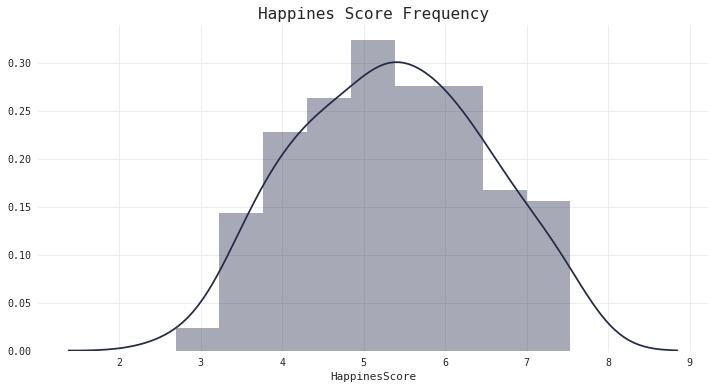

In [43]:
sns.distplot(df.HappinesScore, color=MC);
plt.title('Happines Score Frequency');

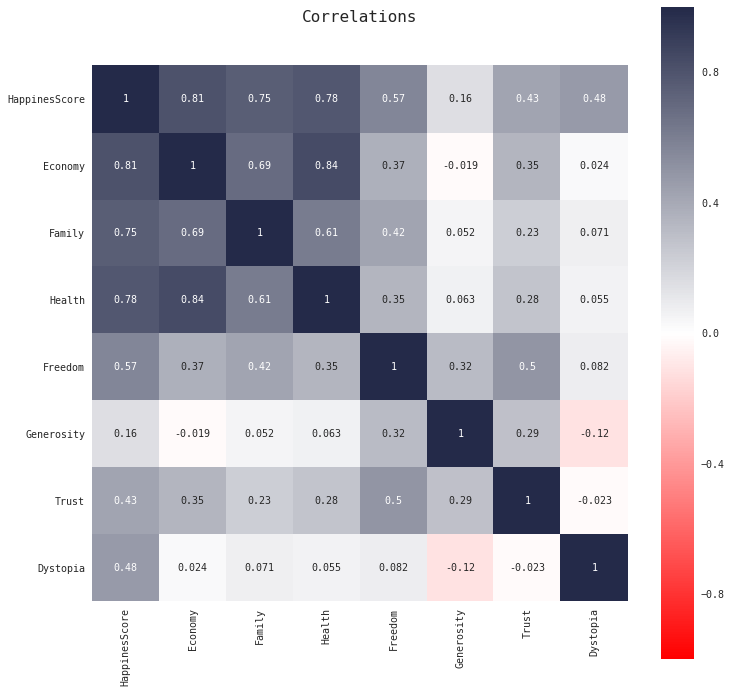

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(df.drop('HappinesRank', axis=1).corr(), cmap=cmap, square=True, annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90);
plt.title('Correlations', y=1.07);

In [64]:
top_correlation = df.drop('HappinesRank', axis=1).corr()['HappinesScore'][1:].sort_values(ascending=False)
top_correlation

Economy      0.81
Health       0.78
Family       0.75
Freedom      0.57
Dystopia     0.48
Trust        0.43
Generosity   0.16
Name: HappinesScore, dtype: float64

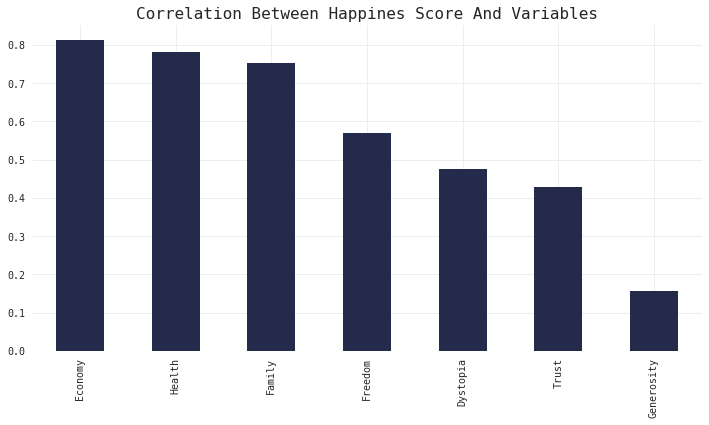

In [68]:
top_correlation.plot('bar', color=MC)
plt.title('Correlation Between Happines Score And Variables');

In [84]:
features_df.columns
corr = features_df.corr()
corr['Economy'][1:10].sort_values(ascending=False)

Health        0.84
Family        0.69
Freedom       0.37
Trust         0.35
Dystopia      0.02
Generosity   -0.02
Name: Economy, dtype: float64

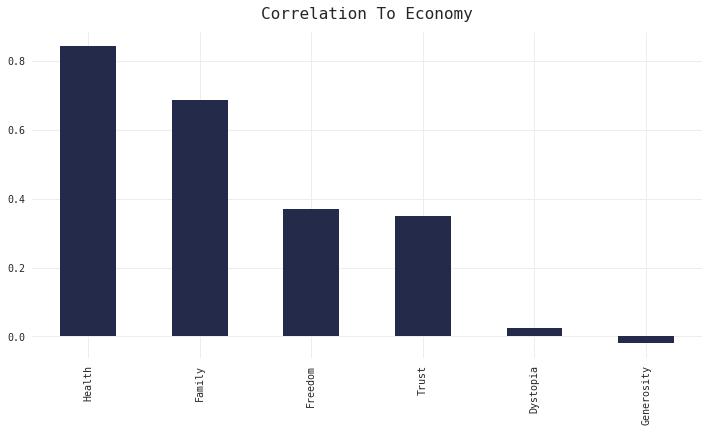

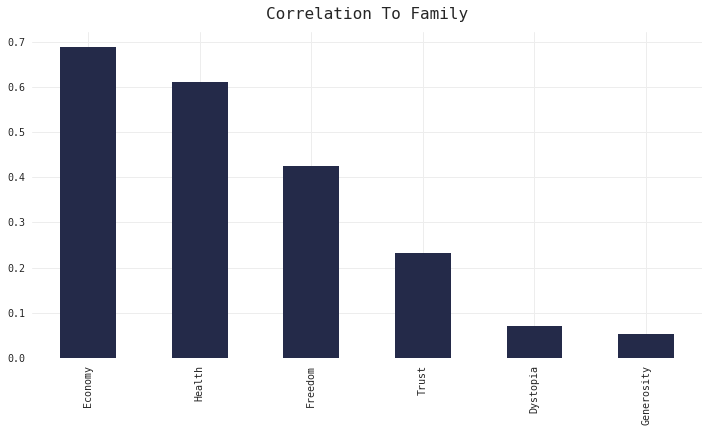

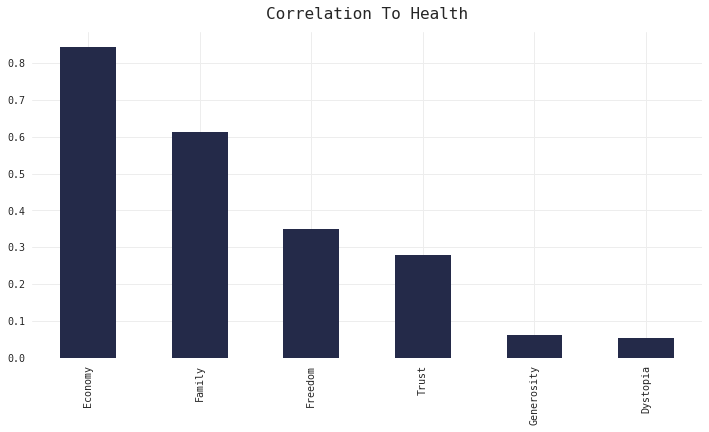

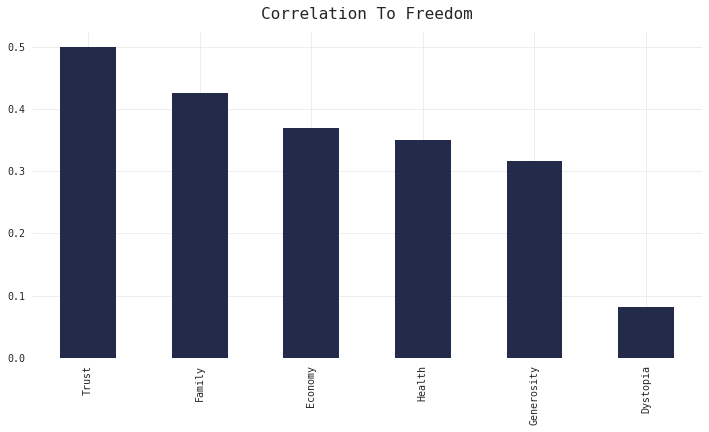

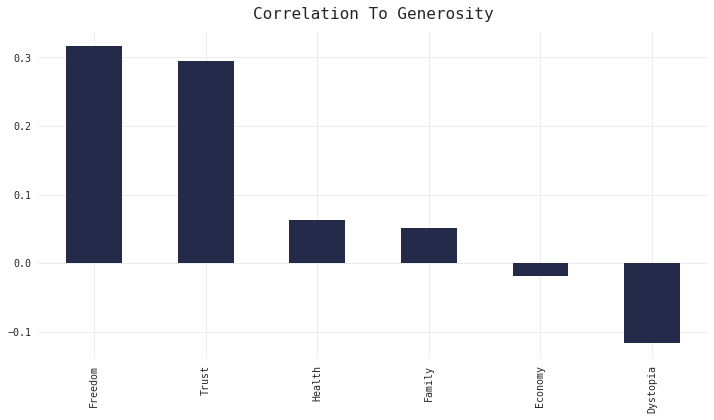

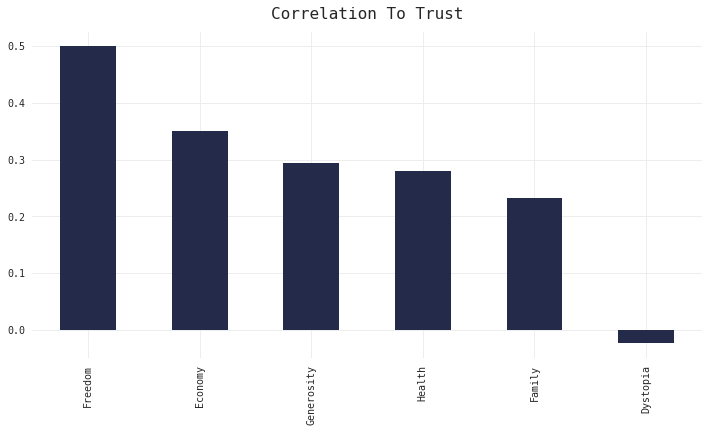

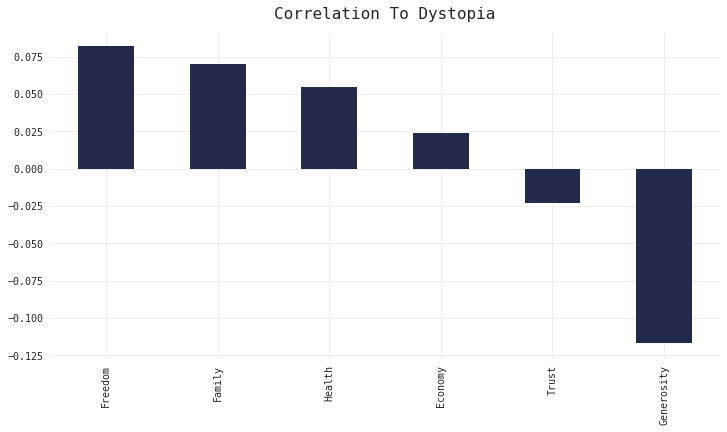

In [93]:
features_df = df.drop(['HappinesRank', 'HappinesScore', 'Country'], axis=1)
corr = features_df.corr()
for feature in features_df.columns:
    top_correlation = corr[feature].drop(feature, axis=0).sort_values(ascending=False)
    plt.figure()
    top_correlation.plot('bar', color=MC)
    plt.title('Correlation To {}'.format(feature), y=1.02);